# Exercise 3.4 Bayes Regression
- Name: Congxin (David) Xu
- Computing ID: cx2rx

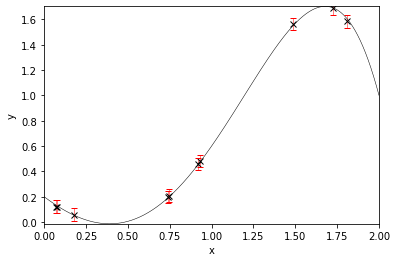

In [2]:
'''
    This is Python code to create the plots shown in Figure 12.1 of Theodoridis'
    textbook "Machine Learning: A Bayesian and Optimization Perspective"
    This code is useful for answering Exercise 3.4 of the UVA Bayesian Machine 
    Learning course.
    
    Written by Bill Basener, University of Virginia
    3/16/2020
'''

import matplotlib.pyplot as plt
import numpy as np


# true signal curve
x = np.arange(0, 2, 10**-4)
y = .2 * np.ones(len(x)) - x + .9 * x**2 + .7 * x**3 - .2 * x**5

# plot the true curve
#plt.plot(x,y)

# training samples
N = 500

# linear coefficients
K = 5

# sample interval [a b]
a = 0
b = 2

# generate samples
x1 = np.arange(a, b, (b-a)/N)

# noise generation
sigma_eta = .05
n = np.sqrt(sigma_eta) * np.random.normal(0,1,N)

# use true parameter theta
theta_true = np.asarray([.2, -1, .9, .7, -.2])

# compute the measurement matrix
Phi = np.transpose(np.vstack([np.ones(N), x1, x1**2, x1**3, x1**5]))
Phi_gram = np.matmul(np.transpose(Phi),Phi)

# generate noisy observations using the linear model
y1 = np.matmul(Phi, theta_true) + n

# EM algorithm
# initializate parameters
# experiment on different initializations
EMiter = 20
betaj = 1
sigma_eta_EM = np.ones(EMiter)
alphaj = 1
Phiy = np.matmul(np.transpose(Phi), y1)
for i in range(EMiter):
    Sigma_theta = np.linalg.inv(betaj * Phi_gram + alphaj * np.identity(K))
    mu_theta = betaj * np.matmul(Sigma_theta, Phiy)
    alphaj = K / (np.linalg.norm(mu_theta)**2 + np.trace(Sigma_theta))
    betaj = N / (np.linalg.norm(y1 - np.matmul(Phi, mu_theta))**2 + np.trace(np.matmul(Sigma_theta, Phi_gram)))
    sigma_eta_EM[i] = 1 / betaj

# perform prediction on new samples
Np = 10

# generate prediction samples
x2 = (b-a) * np.random.uniform(0,1,Np)

# compute prediction measurement matrix
Phip = np.transpose(np.vstack([np.ones(Np), x2, x2**2, x2**3, x2**5]))

# compute the predicted mean and variance
y_pred = np.matmul(Phip, mu_theta)
y_pred_var = np.diag(sigma_eta_EM[-1] + np.linalg.multi_dot([sigma_eta_EM[-1] * 1/alphaj * Phip, np.linalg.inv(sigma_eta_EM[-1] * np.identity(K) + 1/alphaj * Phi_gram ), np.transpose(Phip)]))

# plot the predictions along the condifence intervals
#figure
#plot(x,y,'k',x2,y_pred,'kx')
#hold on;
#errorbar(x2,y_pred,y_pred_var,'r.')
#hold off
#xlabel('x'); ylabel('y')

plt.plot(x, y, color='k', linewidth=0.5)
plt.plot(x2, y_pred, 'x', color='k', markersize=6)
plt.errorbar(x2, y_pred, yerr=y_pred_var, fmt='none', color='r', linewidth=0.5, capsize=3)
plt.xlabel('x')
plt.ylabel('y')
plt.axis([a,b,np.min(y),np.max(y)])
plt.show()

In [4]:
Sigma_theta

array([[ 0.00152212, -0.00659061,  0.00848662, -0.00366928,  0.00022264],
       [-0.00659061,  0.044166  , -0.07143404,  0.0359619 , -0.00267138],
       [ 0.00848662, -0.07143404,  0.13186316, -0.07245565,  0.00600678],
       [-0.00366928,  0.0359619 , -0.07245565,  0.04217779, -0.00375758],
       [ 0.00022264, -0.00267138,  0.00600678, -0.00375758,  0.00036659]])